Overview: The dataset I chose for the Capstone Analytic Report & Research Proposal is related to mass shootings in the United States from 1966-2017. During this time period, there were approximately 400 shootings (observations). The dataset itself was available for download via Kaggle at the following link:

https://www.kaggle.com/algorrt/u-s-mass-shootings-analysis/data

Columns of Interest: Year, Location, Fatalities, Injured, Total Victims, Age, Cause, Open/Close Location, Mental Health Issues, Race, and Gender


Motivation / Purpose: My motivation in using this dataset is that it is a very relevant topic. Further, analytical work excites me when the context holds value in social, political, or economical spectrums. Additionally, after looking through the dataset, I felt there were numerous analytical questions to explore and many to be proposed for future exploration.


Year - No. test 

In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
%matplotlib inline

In [3]:
#Read the dataset in and get a quick look at the underlying data
mass_shootings = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding = "ISO-8859-1", parse_dates=['Date'])
mass_shootings.head(5)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN



Question 1. How many shootings occurred each year? On average, how many shootings were there each year? Do any years stand out as being particularly active or inactive?

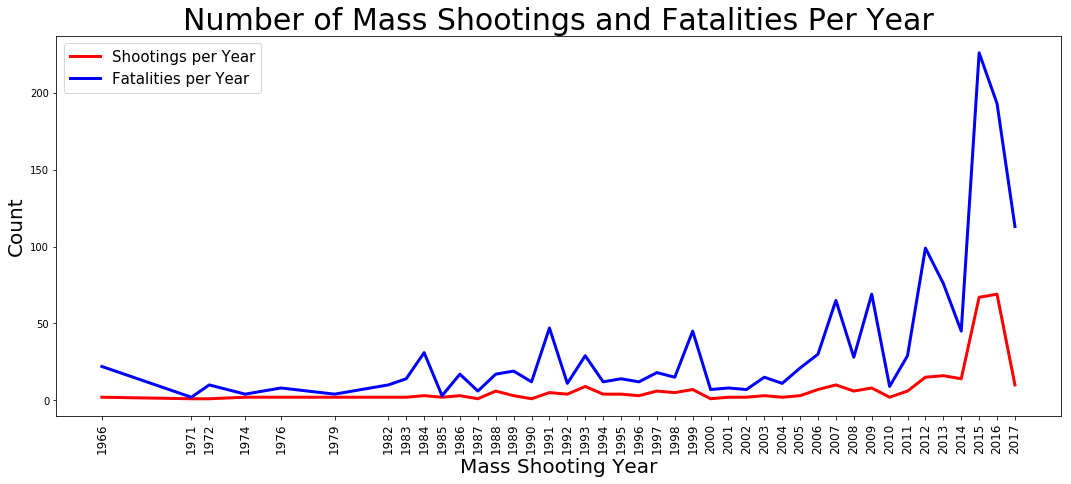

count    42.000000
mean      7.690476
std      14.168822
min       1.000000
25%       2.000000
50%       3.000000
75%       6.750000
max      69.000000
Name: Year, dtype: float64
       Fatalities
count   42.000000
mean    34.119048
std     47.277697
min      2.000000
25%     10.000000
50%     16.000000
75%     30.750000
max    226.000000


In [4]:
#Get year in its own column, create a variable that counts totals
mass_shootings['Year'] = mass_shootings['Date'].dt.year
count_by_year = mass_shootings['Year'].value_counts()
fatalities = mass_shootings[['Year','Fatalities']].groupby('Year').sum()

#Now set plot preferences and show plot
plt.figure(figsize=(18, 7))
plt.plot(count_by_year.sort_index(), color = 'r', linewidth = 3, label='Shootings per Year')
plt.plot(fatalities.sort_index(), color = 'b', linewidth = 3, label='Fatalities per Year')
plt.xticks(count_by_year.index, rotation = 'vertical', fontsize=12)
plt.xlabel('Mass Shooting Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Number of Mass Shootings and Fatalities Per Year', fontsize=30)
plt.legend(fontsize=15)
plt.show()

#Print out .describe() method for both series
print(count_by_year.describe())
print(fatalities.describe())

The plot above shows number of mass shootings and fatalities by year from 1966-2017. There are approximately 7.69 shootings and 34.12 fatalities per year. Further, the year which withstood the most mass shootings (69) was 2016 and the year with the most fatalities was 2015. There are interesting spikes in fatalities where the number of mass shootings was low, for example in 2007, 2009 and 2012.

However, my attention is immediately drawn to the number of shootings and fatalities that occurred in 2015 and 2016. However, in my opinion, the most interesting observation is the sharp decline from 2016 to 2017. Let's dive deeper and analyze what each year looks like when we group by fatalities, injuries and total victims.

,Fatalities,Injured,Total victims
count,42.000000,42.000000,42.000000
mean,34.119048,47.500000,78.928571
std,47.277697,95.991933,130.569558
min,2.000000,0.000000,5.000000
25%,10.000000,9.000000,17.250000
50%,16.000000,20.500000,34.000000
75%,30.750000,41.500000,68.750000
max,226.000000,558.000000,670.000000


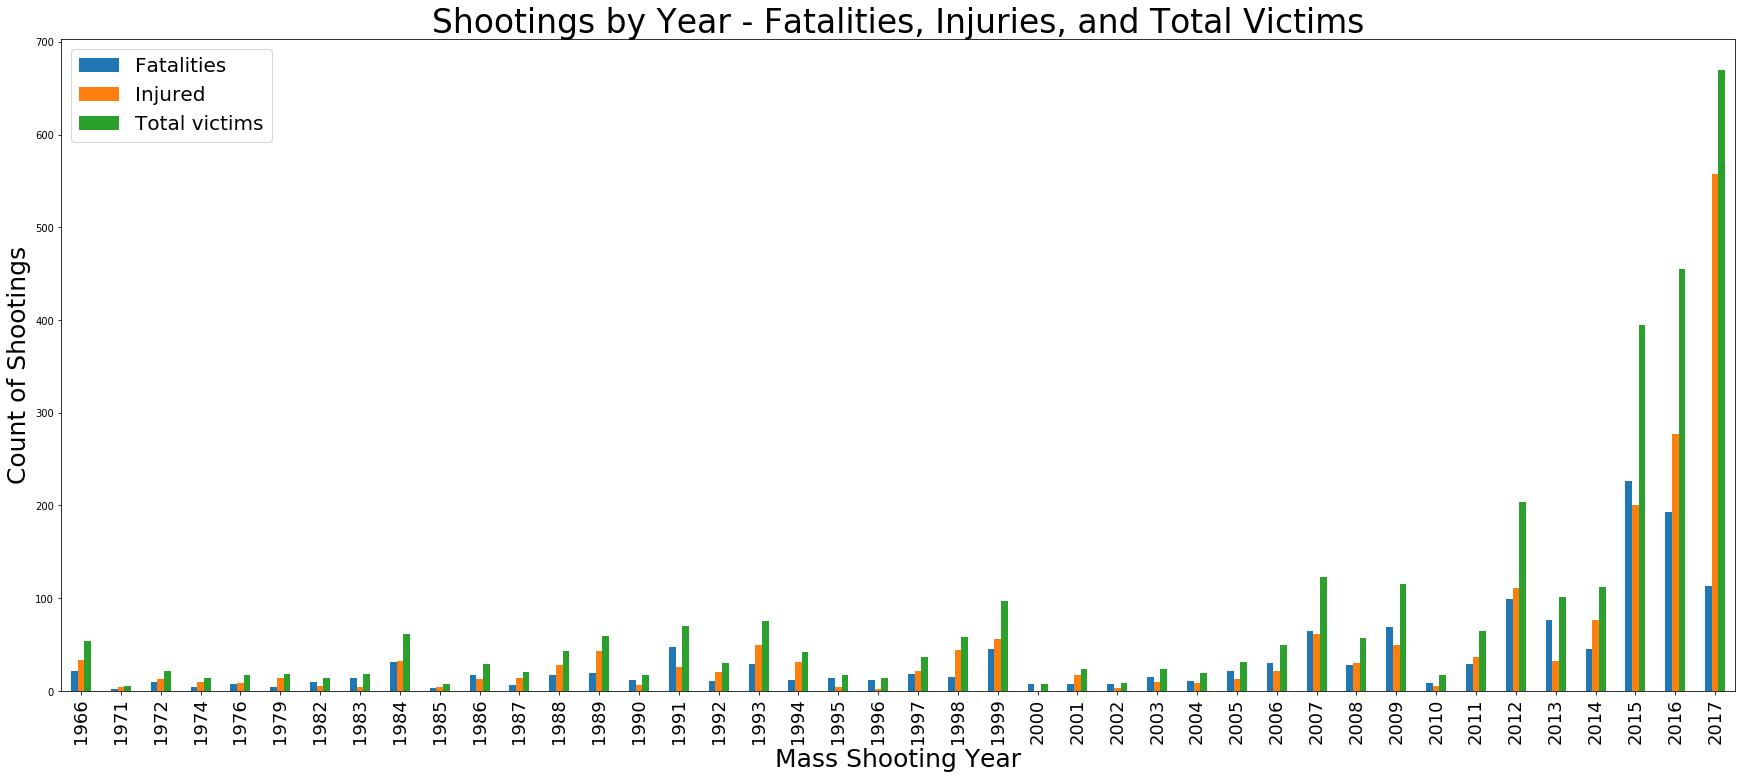

In [5]:
#Create variable to show fatalities, injuries, total victims grouped by year
year_in_depth = mass_shootings[['Year','Fatalities','Injured','Total victims']].groupby('Year').sum()

#Set plot preferences and show plot
year_in_depth.plot.bar(figsize=(30, 12))
plt.legend(fontsize=20)
plt.title('Shootings by Year - Fatalities, Injuries, and Total Victims', fontsize=33)
plt.xlabel('Mass Shooting Year', fontsize=25)
plt.ylabel('Count of Shootings', fontsize=25)
plt.xticks(fontsize=18)

#Describe the data
year_in_depth.describe()

While 2017 only registered 10 shootings according to our plot above, it displays the highest number of injuries and total victims for our time period. We may be able to determine if there are any outliers in 2017 by filtering our dataframe.

In [6]:
#Let's see if there was one large incident that led to the skewed count. Let's pick
#150 as a starting point.

mass_shootings[mass_shootings['Total victims'] > 150]['Total victims']

3    585
Name: Total victims, dtype: int64

I believe we have our answer. The 585 total victims in one incident surely made 2017 seem like a much more active year than 2015 and 2016. Although 2017 was a bit deceiving, it does not change the fact that 2015-2017 were the most deadly (fatalities) years out of any others in our time period. Not only that, but they are consectutive.

Now that we have analyzed our data at the year level, let's move on to dissect shootings by state.




Question 2. How many shootings occurred each year in every state? During this time period, what were the average number of shootings per state? Additionally, out of the states with the most shootings (top 3), which was the deadliest in terms of fatalities?

In [7]:
#Separate our 'Location' column which currently gives us
#a "City, State" format into two new columns for 'City' and 'State'

for i in mass_shootings['Location']:
    mass_shootings['City'] = mass_shootings['Location'].str.partition(',')[0]
    mass_shootings['State'] = mass_shootings['Location'].str.partition(',')[2]

#Drop NA's
mass_shootings['City'] = mass_shootings['City'].dropna()
mass_shootings['State'] = mass_shootings['State'].dropna()

#Now print the head of our new 'State' column
mass_shootings['State'].head(10)

0             TX
1             CO
2             MD
3             NV
4             CA
5             PA
6        Florida
7           Ohio
8     California
9        Florida
Name: State, dtype: object

In [8]:
#Decided to convert the format to state abbreviations. Due to some data 
#having more than one city listed in the 'Location' column and therefore more than 
#one ',' which is what our partition method was based on, we need to re-categorize some
#of this data.

mass_shootings['State'].replace([' TX', ' CO', ' MD', ' NV', ' CA', ' PA', ' Florida', ' Ohio',
       ' California', ' WA', ' LA', ' Texas', ' Missouri',
       ' Virginia', ' North Carolina', ' Tennessee', ' Texas ',
       ' Kentucky', ' Alabama', ' Pennsylvania', ' Kansas',
       ' Massachusetts', '  Virginia', ' Washington', ' Arizona',
       ' Michigan', ' Mississippi', ' Nebraska', ' Colorado',
       ' Minnesota', ' Georgia', ' Maine', ' Oregon', ' South Dakota',
       ' New York', ' Louisiana', ' Illinois', ' South Carolina',
       ' Wisconsin', ' Montana', ' New Jersey', ' Indiana', ' Oklahoma',
       ' New Mexico', ' Idaho',
       ' Souderton, Lansdale, Harleysville, Pennsylvania',
       ' West Virginia', ' Nevada', ' Albuquerque, New Mexico',
       ' Connecticut', ' Arkansas', ' Utah', ' Lancaster, Pennsylvania',
       ' Vermont', ' San Diego, California', ' Hawaii', ' Alaska',
       ' Wyoming', ' Iowa'], ['TX', 'CO', 'MD', 'NV', 'CA', 'PA', 'FL', 'OH', 'CA', 'WA', 'LA',
        'TX', 'MO', 'VA', 'NC', 'TN', 'TX', 'KY', 'AL', 'PA', 'KS', 'MA', 'VA', 'WA', 'AZ', 'MI',
        'MS', 'NE', 'CO', 'MN', 'GA', 'ME', 'OR', 'SD', 'NY', 'LA', 'IL', 'SC', 'WI', 'MT',
        'NJ', 'IN', 'OK', 'NM', 'ID', 'PA', 'WV', 'NV', 'NM', 'CT', 'AR', 'UT',
        'PA', 'VT', 'CA', 'HI', 'AL', 'WY', 'IA'], inplace=True)

#Create dataframe without NA's
mass_shootings_state_without_na = pd.DataFrame(mass_shootings['State'].dropna())

#Confirm that this worked
mass_shootings_state_without_na['State'].unique()

array(['TX', 'CO', 'MD', 'NV', 'CA', 'PA', 'FL', 'OH', 'WA', 'LA', 'MO',
       'VA', 'NC', 'TN', 'KY', 'AL', 'KS', 'MA', 'AZ', 'MI', 'MS', 'NE',
       'MN', 'GA', 'ME', 'OR', 'SD', 'NY', 'IL', 'SC', 'WI', 'MT', 'NJ',
       'IN', 'OK', 'NM', 'ID', 'WV', '', 'CT', 'AR', 'UT', 'VT', 'HI',
       'WY', 'IA'], dtype=object)

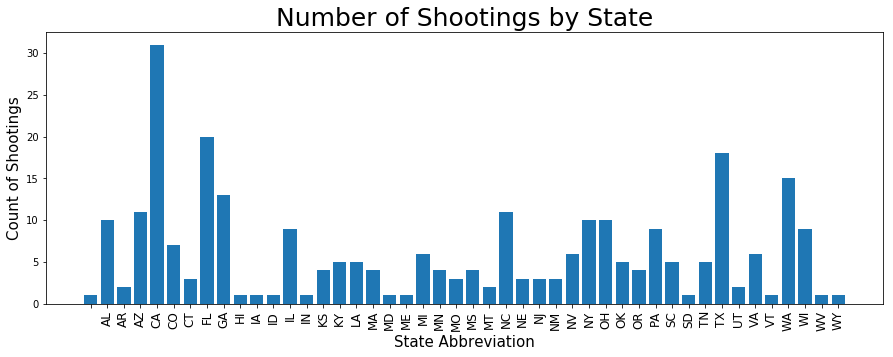

count    46.000000
mean      6.043478
std       5.988717
min       1.000000
25%       2.000000
50%       4.000000
75%       9.000000
max      31.000000
Name: State, dtype: float64

In [9]:
#Finally, now that our state data is clean, we can take a look at the number of shootings by
#state.

#Create variable looking just at state value counts
shooting_by_state = mass_shootings_state_without_na['State'].value_counts()

#Now set plot preferences and show plot
plt.figure(figsize=(15, 5))
plt.bar(shooting_by_state.index, shooting_by_state.values)
plt.xticks(rotation = 'vertical', fontsize=12)
plt.xlabel('State Abbreviation', fontsize=15)
plt.ylabel('Count of Shootings', fontsize=15)
plt.title('Number of Shootings by State', fontsize=25)
plt.show()

#Describe the data
shooting_by_state.describe()

Our mean tells us that there have been an average of approximately 6.04 shootings per state during our time period. Looking our three most active states of California, Florida, and Texas, which was the the most deadly?

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

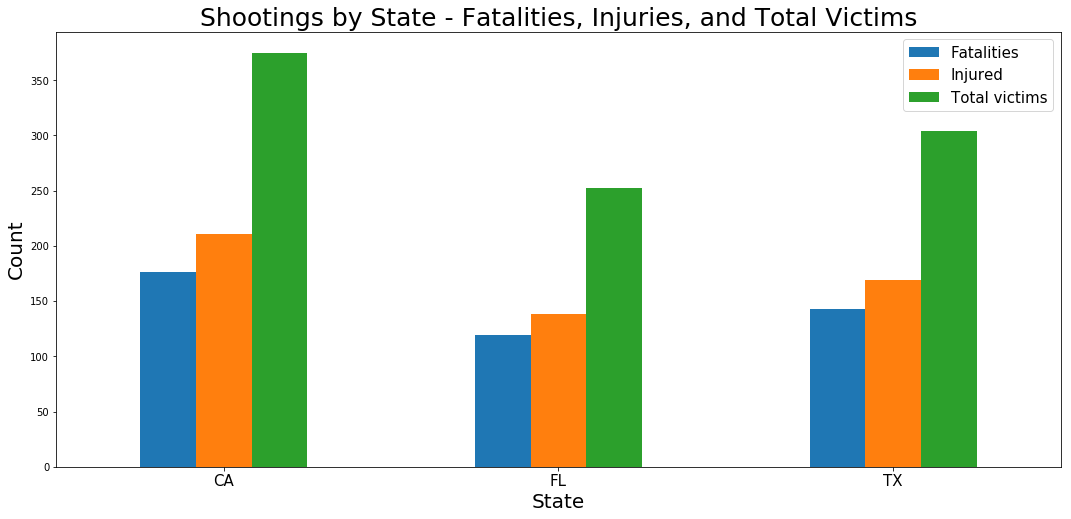

In [10]:
#Create variable for only our top states, then another variable which groups them by fatalities
#injuries, and total victims
highest_states = mass_shootings[mass_shootings["State"].isin(['CA', 'FL', 'TX'])]
deadliest_state = highest_states[['State','Fatalities','Injured', 'Total victims']].groupby('State').sum()

#Set plot preferences and show plot
deadliest_state.plot.bar(figsize=(18, 8))
plt.legend(fontsize=15)
plt.title('Shootings by State - Fatalities, Injuries, and Total Victims', fontsize=25)
plt.xlabel('State', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15, rotation='horizontal')

As one might have suspected, California has been the most deadly state in terms of mass shootings. Something I want to bring attention to is the pattern of fatalities to injuries to total victims that you see in each of the states above. The ratios all appear to be about on par with eachother.  In the next part of our analysis, I want to look at the fatality rate per each incident and what factors might increase or decrease this rate.






Question 3. Aside from the total number of shoootings and aggregate counts of fatalities, injuries and total victims by year and state, is there a way to measure the "deadliness" of a particular shooting incident? Further, are their factors that make a shooting more "deadly" than others?

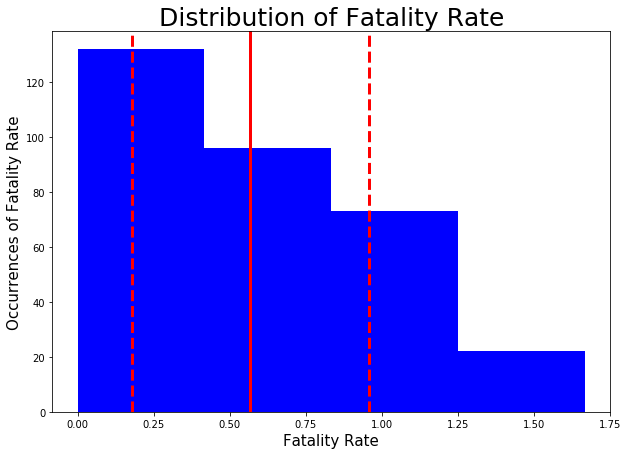

count    323.000000
mean       0.568066
std        0.390242
min        0.000000
25%        0.250000
50%        0.545455
75%        0.894444
max        1.666667
Name: Fatality Rate, dtype: float64

In [11]:
#First, create our 'Fatality Rate' measure by creating a new column. Next create a variable for
#just that new column from our mass_shootings dataframe.
mass_shootings['Fatality Rate'] = mass_shootings['Fatalities']/mass_shootings['Total victims']
fatality_rate = mass_shootings['Fatality Rate']

#Set plot preferences
plt.figure(figsize=(10, 7))
plt.hist(mass_shootings['Fatality Rate'], bins=4, color='b')
plt.xlabel('Fatality Rate', fontsize=15)
plt.ylabel('Occurrences of Fatality Rate', fontsize=15)
plt.title('Distribution of Fatality Rate', fontsize=25)

#Plot the distribution and show mean/standard deviation to get a feel for whether or not those
#descriptive statistics are a good measure. Then show the plot
plt.axvline(fatality_rate.mean(), color='r', linestyle='solid', linewidth=3)
plt.axvline(fatality_rate.mean() + fatality_rate.std(), color='r', linestyle='dashed', linewidth=3)
plt.axvline(fatality_rate.mean()-fatality_rate.std(), color='r', linestyle='dashed', linewidth=3) 

plt.show()

#Describe the data
fatality_rate.describe()

The mean (0.568) seems consistent with what I might expect. The standard deviation (0.39) on the other hand shows us how the data varies. However, the maximum rate of 1.667 is something that strikes me as odd. I did not expect a possible fatality rate greater than 1 and this could definitely be a cause for the higher standard deviation. Based on looking at the data above, it seems as though the dataset does not include fatality of the shooter as being a victim. Let's take a look below.

In [12]:
pd.set_option('display.max_columns', 25)
mass_shootings[mass_shootings["Fatalities"] > mass_shootings['Total victims']].head(5)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Year,City,State,Fatality Rate
30,31,"Sherman, Texas Family Murder-Suicide","Sherman, Texas",2016-03-21,NaN,NaN,Family,domestic dispute,"A man shot and killed his wife and two boys, t...",4,0,3,0.0,NaN,NaN,NaN,Unknown,Unknown,Male,33.635662,-96.608880,2016,Sherman,TX,1.333333
31,32,"Louisville, KY Family Murder-Suicide","Louisville, Kentucky",2016-03-20,Home,Close,Family,domestic dispute,A former soldier who fatally shot his wife and...,4,0,3,0.0,NaN,1.0,Military,Yes,White American or European American,Male,38.252665,-85.758456,2016,Louisville,KY,1.333333
50,51,"Belfair, Washington","Belfair, Washington",2016-02-26,Home,Close,Family,domestic dispute,"At around 9am on Friday morning, a man phoned ...",5,0,4,0.0,NaN,NaN,NaN,Unknown,White American or European American,Male,47.503300,-122.931000,2016,Belfair,WA,1.250000
53,54,"Belfair, WA Family murder-suicide",NaN,2016-02-25,Home,Close,Family,psycho,"Man killed wife, two kids, and neighbor before...",5,0,4,0.0,NaN,NaN,NaN,Unknown,White American or European American,Male,47.451459,-122.826946,2016,NaN,NaN,1.250000
54,55,Arizona Family Murder,"Glendale, Arizona",2016-02-23,Home,Close,Family,psycho,Son shot his parents and two sisters in their ...,5,0,4,0.0,NaN,NaN,NaN,Unknown,White American or European American,Male,33.448377,-112.074037,2016,Glendale,AZ,1.250000


As we can see from the excerpt above, there are several observations (27 to be exact, only showing 5 here) where fatalities are greater than total victims, due to the fact that the shooter's death was counted as a fatality, but not as a victim. Now that we've seen our distribution of fatality rates, are there any factors that may lead to higher rates. Let's look at the shooting location to see what we can find.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

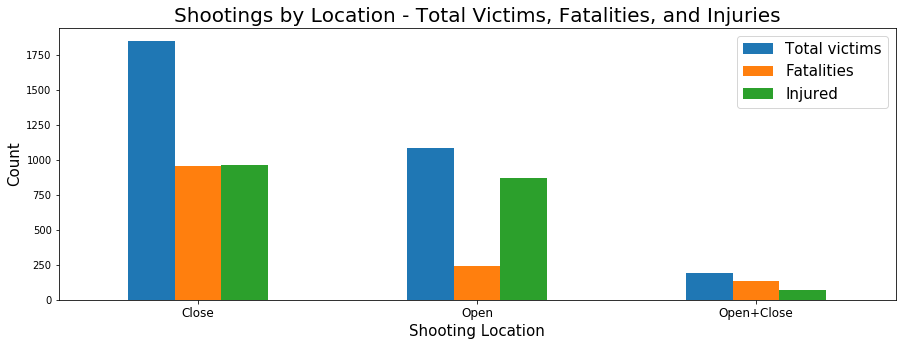

In [13]:
#Let's first look at location at an aggregate level

#Need to recategorize based on typo in our data (Open+CLose). Identify the row and change
#that value to be consistent with 'Open+Close'. Find the index for incorrect value:
mass_shootings.loc[mass_shootings['Open/Close Location'] == 'Open+CLose']

#Now, change the value
mass_shootings.at[280, 'Open/Close Location'] = 'Open+Close'

#Create variable to show total victims, fatalities, and injuries gropued by Open/Close Location
open_close = mass_shootings[['Open/Close Location', 'Total victims', 'Fatalities', 'Injured']].groupby('Open/Close Location').sum()

#Set plot preferences and show plot
open_close.plot.bar(figsize=(15,5))
plt.title('Shootings by Location - Total Victims, Fatalities, and Injuries', fontsize=20)
plt.xlabel('Shooting Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(rotation='horizontal', fontsize=12)

The ratio of total victims, to falalities, to injuries that we saw at the state level previously were all similar. Based on the plot above, we see a clear difference in that ratio between 'Closed' and 'Open' locations. This may prove to be a determining factor in fatality rate. Let's look at the fatality rate for each of these categories.

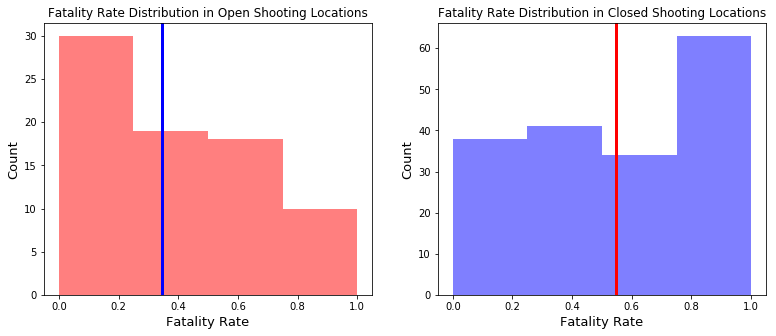

In [15]:
#Create two dataframes looking solely at shooting locations of 'Open' and 'Close'

open_location = pd.DataFrame(mass_shootings[mass_shootings['Open/Close Location'] == 'Open'])
closed_location = pd.DataFrame(mass_shootings[mass_shootings['Open/Close Location'] == 'Close'])

#Based on what we saw earlier, only take fatality rates less than or equal to 1
open_location = open_location[open_location['Fatality Rate'] <= 1]
closed_location = closed_location[closed_location['Fatality Rate'] <= 1]

#Set plot preferences. Want to plot 2 histograms (in subplot fashion) of distribution of 
#fatality rate based on shooting location

plt.figure(figsize=[20,5])

plt.subplot(1, 3, 1)
plt.hist(open_location['Fatality Rate'], bins=4, color='r', alpha=.5, label='Open')
#Show line for mean so we can compare
plt.axvline(open_location['Fatality Rate'].mean(), color='b', linestyle='solid', linewidth=3)
plt.title('Fatality Rate Distribution in Open Shooting Locations')
plt.ylabel('Count', fontsize=13)
plt.xlabel('Fatality Rate', fontsize=13)

plt.subplot(1, 3, 2)
plt.hist(closed_location['Fatality Rate'], bins=4, color='b', alpha=.5, label='Closed')
#Similar to open_location above, show line for mean so we can compare
plt.axvline(closed_location['Fatality Rate'].mean(), color='r', linestyle='solid', linewidth=3)
plt.title('Fatality Rate Distribution in Closed Shooting Locations')
plt.ylabel('Count', fontsize=13)
plt.xlabel('Fatality Rate', fontsize=13)

plt.show()

Based on what was observed earlier where we had fatality rates greater than 1, I thought it best to exclude those observations from this plot. As expected, the mean of fatality rate for closed shooting locations was significantly higher. The reason for this increase in fatality rate could be as simple as when shootings occur with a closed space, there is less opportunity for victims to find cover or shelter.

Question 4.  What was the distribution of shooter age? Is there any correlation between the shooter's age and the number of associated fatalities? Further, what other factors around the shooter stood out in terms of race, gender or mental health?

In [29]:
#Let's start by looking at the distribution of shooter age. There are a couple instances where
#more than one shooter is present, let's try to separate those out first. 

def split_age_second_shooter(age):
   second_shooter_age = age.split(',')
   if len(second_shooter_age) == 2:
       return second_shooter_age[1]
   else:
       return 0

def split_age_first_shooter(age):
   first_shooter_age = age.split(',')
   if len(first_shooter_age) == 2:
       return first_shooter_age[0]
   else:
       return age

#Create new columns for 'First Shooter Age' and 'Second Shooter Age' and then apply our functions above

mass_shootings['Age'] = mass_shootings['Age'].astype(str)
mass_shootings['Second Shooter Age'] = mass_shootings['Age'].apply(split_age_second_shooter)
mass_shootings['First Shooter Age'] = mass_shootings['Age'].apply(split_age_first_shooter)

#Next, create variables that exclude NA's and 0's
#mass_shootings_without_zeros_nans = pd.DataFrame(mass_shootings[(mass_shootings['First Shooter Age'] != '0') & (mass_shootings['Second Shooter Age'] != '0')])
#mass_shootings_without_zeros_nans = pd.DataFrame(mass_shootings[(mass_shootings['First Shooter Age'] != 'NaN') & (mass_shootings['Second Shooter Age'] != 'NaN')])


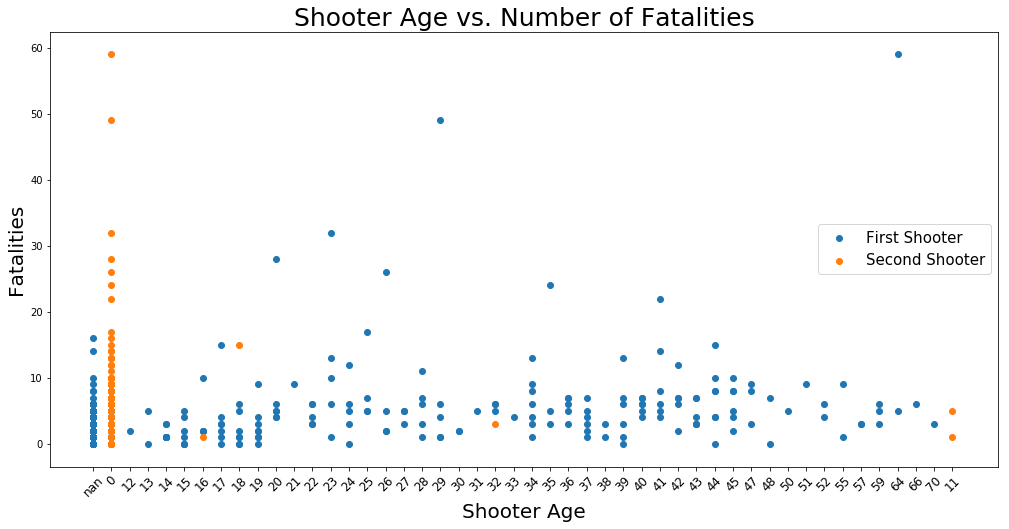

In [30]:
#Set plot preferences and show plot
plt.figure(figsize=(17, 8))
plt.scatter(x=mass_shootings_without_zeros_nans['First Shooter Age'], y=mass_shootings_without_zeros_nans['Fatalities'], label='First Shooter')
plt.scatter(x=mass_shootings_without_zeros_nans['Second Shooter Age'], y=mass_shootings_without_zeros_nans['Fatalities'], label='Second Shooter')
plt.xlabel('Shooter Age', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Fatalities', fontsize=20)
plt.title('Shooter Age vs. Number of Fatalities', fontsize=25)
plt.legend(fontsize=15, loc='best')

plt.show()

Based on the scatter plot above, there is no real trend between age and fatalities. It seems as if age is not necessarily a key determinant in measuring how catastrophic a particular shooter may be.

In [28]:
#Next, let's see if we can dissect the 'Cause' column. After running a unique() method I
#found that several causes could be combined to provide us with some more concrete results.
#For example 'anger' should be combined into one category absorbing 'frustration' and 'revenge'.

mass_shootings['Cause'].replace(['unknown', 'terrorism', 'unemployement', 'racism',
       'frustration', 'domestic dispute', 'anger', 'psycho', 'revenge',
       'domestic disputer', 'suspension', 'religious radicalism', 'drunk',
       'failing exams', 'breakup', 'robbery'], ['Unknown', 'Terrorism', 'Unemployment', 'Racism',
        'Anger', 'Domestic Dispute', 'Anger', 'Pyschotic', 'Anger', 'Domestic Dispute',
        'Suspension', 'Religious Radicalism', 'Drunk', 'Failing Exams', 'Breakup', 
        'Robbery'], inplace=True)

#Create dataframe without NA's
mass_shootings_cause_without_na = pd.DataFrame(mass_shootings['Cause'].dropna())

#Confirm that this worked
mass_shootings_cause_without_na['Cause'].unique()

array(['Unknown', 'Terrorism', 'Unemployment', 'Racism', 'Anger',
       'Domestic Dispute', 'Pyschotic', 'Suspension',
       'Religious Radicalism', 'Drunk', 'Failing Exams', 'Breakup',
       'Robbery'], dtype=object)

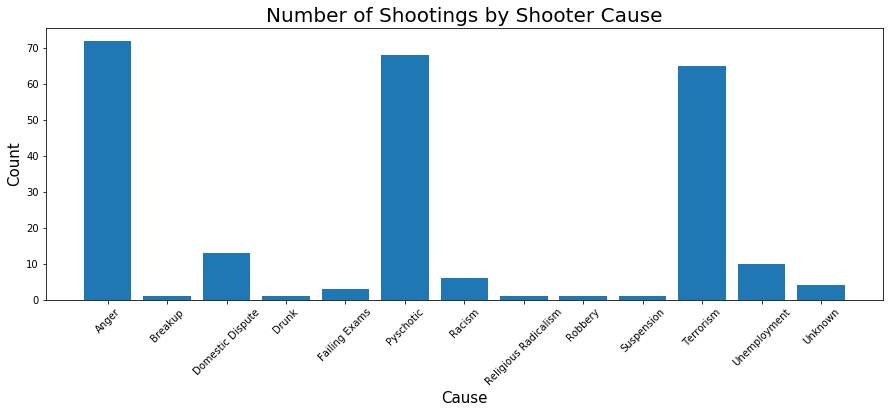

In [29]:
#Create variable for cause value counts
cause = mass_shootings_cause_without_na['Cause'].value_counts()

#Set plot preferences and show plot
plt.figure(figsize=(15, 5))
plt.bar(cause.index, cause.values)
plt.xlabel('Cause', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Number of Shootings by Shooter Cause', fontsize=20)
plt.xticks(rotation = 45)

plt.show()

After combining some of the original categories, 'Anger' becomes the most prevalent, followed by 'Psychotic' and 'Terrorism'. I am skeptical to reduce a shooting cause down to a single characteristic and it seems as if some of these would overlap. For example, there are potential misleading characteristics to this plot as some individuals who were categorized under 'Terrorism' could also by 'Pyschotic', and are likely motivated by anger ('Angry') as well.

In [35]:
#Next, let's look at race and gender. We want to see fatalities, injuries and total victims by 
#race first. Similar to above, better groupings must be established.

mass_shootings['Race'].replace(['White', 'Black', 'Asian', 'Latino', 'Other', 'Unknown',
       'Black American or African American',
       'White American or European American', 'Asian American',
       'Some other race', 'Two or more races',
       'Black American or African American/Unknown',
       'White American or European American/Some other Race',
       'Native American or Alaska Native', 'white', 'black',
       'Asian American/Some other race'], ['White', 'Black', 'Asian', 'Latino', 'Other', 
        'Other', 'Black', 'White', 'Asian', 'Other', 'Other', 'Black', 'White', 
        'Native', 'White', 'Black', 'Asian'], inplace=True)


Text(0.5,0,'Race')

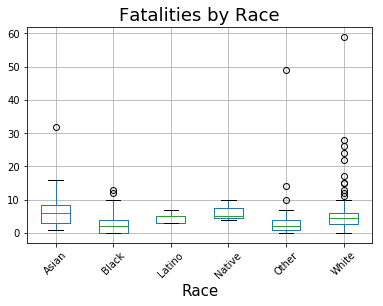

In [36]:
#Now that race categories are established, set plot preferences and show plot
mass_shootings[['Race', 'Fatalities']].boxplot(by='Race')
plt.suptitle('')
plt.xticks(rotation='vertical')
plt.title('Fatalities by Race', fontsize=18)
plt.xticks(rotation=45, )
plt.xlabel('Race', fontsize=15)

The striking observation from the boxplot above is the number of 'outliers' that exist for our 'White' category. The reason I put outliers in quotations is because, when compared to other races, I do not think these are necessarily outliers within the scope of the plot itself. We can definitely see a trend in our shooters as 'White'.

In [37]:
#Now, let's look at gender. First, we need to recreate the groupings
mass_shootings['Gender'].replace(['M', 'Unknown', 'Male', 'M/F', 'Male/Female', 'Female'],
['Male', 'Unknown', 'Male', 'Male & Female', 'Male & Female',
'Female'], inplace = True)

Text(0.5,0,'Gender')

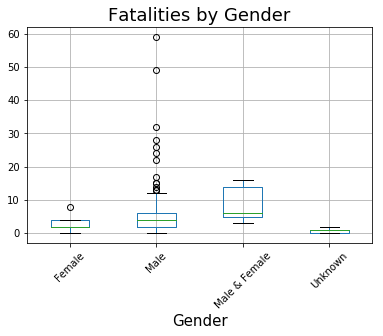

In [38]:
#Now that gender categories are established, set plot preferences and show plot
mass_shootings[['Gender', 'Fatalities']].boxplot(by='Gender')
plt.suptitle('')
plt.xticks(rotation='vertical')
plt.title('Fatalities by Gender', fontsize=18)
plt.xticks(rotation=45, )
plt.xlabel('Gender', fontsize=15)

Similar to the above 'Race' boxplot, the 'Gender' boxplot reveals several 'outliers' for our 'Male' gender. Again, within the context of the boxplot, I think these outliers are more of a definite trend in our dataset. With the combination of our 'Race' boxplot above, we can definitely see a trend of white men as our primary shooter.

In [39]:
#Now let's look at mental health. I am interested to know the number of individuals with 
#known mental health issues. Again, need to combine categories first.

mass_shootings['Mental Health Issues'].replace(['No', 'Unclear', 'Yes', 'Unknown', 'unknown'],
['No', 'Unknown', 'Yes', 'Unknown', 'Unknown'], inplace=True)


Text(0,0.5,'Known Mental Health Issues')

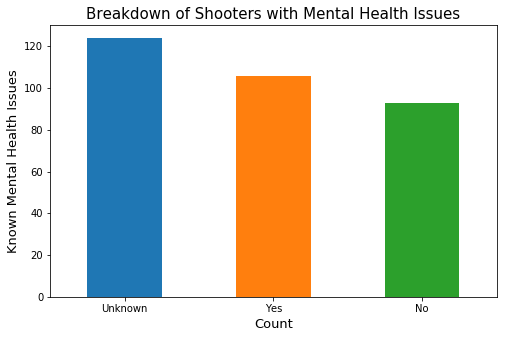

In [40]:
#Now that mental health categories are established, create variable to show value counts for all
#categories
mental_health = mass_shootings['Mental Health Issues'].value_counts()

#Set plot preferences and show plot
mental_health.plot.bar(figsize=(8, 5))
plt.title('Breakdown of Shooters with Mental Health Issues', fontsize=15)
plt.xticks(rotation='horizontal')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Known Mental Health Issues', fontsize=13)

The plot above is difficult to interpret. We do not know how this data was collected. For example, was it solely based on prior psychiatry/medical records of the shooter, or was it based on tests conducted after the shooting. Therefore, I cannot make any conclusions. However, this would definitely be an area of further exploration.

Conclusion?